---
bibliography:
  - bibliography.bib
---

# Mathematical Models for Time Series

### Mathematical Models for Time Series Example 1.1:
Assume, that a person starts walking from the coordinate center with constant speed in $x$-direction. At each step, however, the person decides *at random* either to walk $1$m to the left or to the right. This is the simplest instance of a *random walk*. The probabilistic model for this random walk would be

1. Choose $n$ independent Bernoulli random variables $D_1,\dots, D_n$ that take on the values $1$ and $-1$ with equal probability, i.e. $p=0.5$.
1. Define the random variables $X_i = D_1+\dots+D_i$ for each $1\leq i\leq n$. Then $\{X_1, X_2,\dots\}$ is a discrete stochastic process modeling the random walk.

The following `Python`-code computes a particular instance of this process, i.e. a time series $\{x_1,x_2,\dots\}$. Each time this code is re-run, a new time series will display. The function `np.cumsum()` computes the cumulated sum of a given vector.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

nsamp = 10000
# Random samples d and cumulative sum x
d = np.random.choice(a=[-1,1], size=nsamp, replace=True)

x = np.cumsum(d)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x)
ax.grid()
plt.xlabel("Time")
plt.ylabel("y-deviation in [m]")

plt.show()

From the definition of the process it is clear that the following recursive definition is equivalent
$$
X_i = X_{i-1} + D_i,\quad X_0 = 0.
$$
If in each step a fixed constant $\delta$ is added to the series, i.e.
$$
Y_i = \delta + Y_{i-1} + D_i,\quad Y_0 = 0.
$$
then we obtain a *random walk* with *drift*. In the figure, we see the observed time series of such a process. The random walk with drift models are used to model trends in time series data.

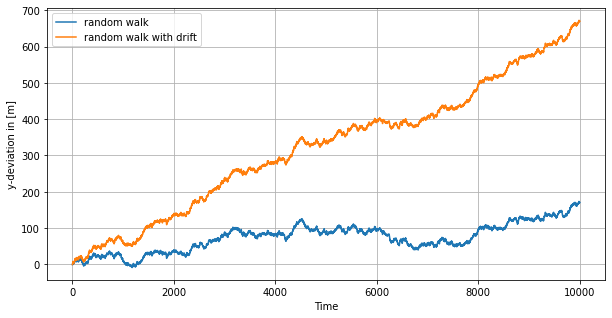

In [2]:
# Set random seed
np.random.seed(0)
# Random samples d and cumulative sum x
d = np.random.choice(a=[-1,1], size=nsamp, replace=True)
x = np.cumsum(d)
# Add drift delta
delta = 5e-2
y = np.linspace(0, nsamp*delta, nsamp)
y += x

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, label="random walk")
ax.plot(y, label="random walk with drift")
ax.grid()
plt.xlabel("Time")
plt.ylabel("y-deviation in [m]")
plt.legend()

plt.show()

### Mathematical Models for Time Series Example 1.2
A white noise process consists of independent and identically distributed random variables $\{W_1,W_2,\dots\}$ where each $W_i$ has mean $0$ and variance $\sigma^2$.

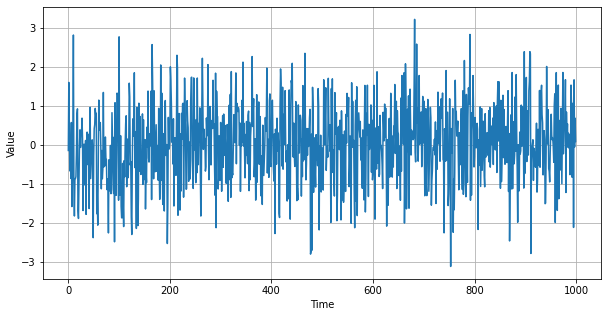

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# White noise signal
w = np.random.normal(size=1000)

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(w)
ax.grid()
plt.xlabel("Time")
plt.ylabel("Value")

plt.show()

If in addition the individual random variables $W_i$ are normally distributed, then the process is called _Gaussian_ white noise. These models are used to describe noise in engineering applications. The term _white_ is chosen in analogy to white light and indicates that all possible periodic oscillations are present in a time series originating from a white noise process with equal strength.

### Mathematical Models for Time Series Example 1.3
If we apply a sliding window filter to the white noise process $\{W_1,W_2,\dots\}$ in the previous example of white noise we obtain a _moving average_ process. E.g. if we choose the window length to be $3$, we obtain
$$
V_i = \frac{1}{3}(W_{i-1} + W_i + W_{i+1}).
$$
We choose $V_1 = W_1$ and $V_2 = 0.5(W_1 + W_2)$. The resulting process is smoother, i.e. the higher order oscillations are smoothed out. 
In `Python` a sliding window can be achieved using `.rolling()`, the mean can be found with `.mean()`.

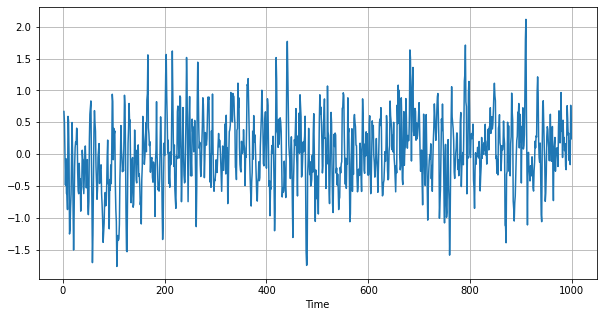

In [2]:
import pandas as pd

# Convert to DataFrame
w = pd.DataFrame(w)
# Filter with window = 3
v = w.rolling(window=3).mean()

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(v)
ax.grid()
plt.xlabel("Time")

plt.show()

### Mathematical Models for Time Series Example 1.4
We consider again the white noise process $\{W_1,W_2,\dots\}$ and recursively compute the following sequence
$$
X_i = 1.5 X_{i-1} - 0.9 X_{i-2} + W_i.
$$
In other words, the value of the process at time instance $i$ is modelled as a linear combination of the past two values plus some random component. Therefore this process is called *autoregressive*. The definition of the initial conditions is subtle, because the process will strongly depend on these. We will for the time being ignore the issue of initial conditions. 

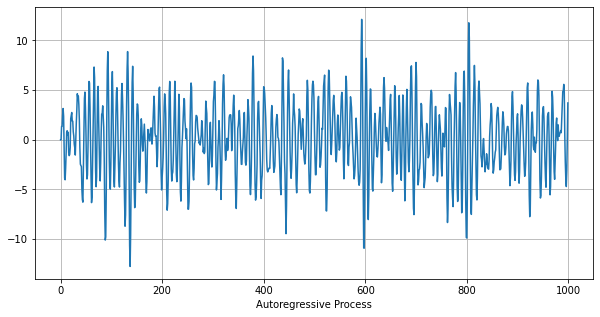

In [6]:
# Autoregressive filter:
ar = np.zeros(1000)
for i in range(2,1000):
    ar[i] = 1.5 * ar[i-1] - 0.9 * ar[i-2] + w.iloc[i]
    
# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(ar)
ax.grid()
plt.xlabel("Autoregressive Process")

plt.show()

The figure shows a realization of the autoregressive process above. The oscillatory behaviour becomes clearly visible. Another interpretation of the autoregressive process above is via differential equations. The finite difference scheme for the second order equation
$$
\ddot x + 2\delta \dot x + \omega_0^2 x = W(t) 
$$
is given by
$$
\frac{x_{i-2} - 2x_{i-1} + x_{i}}{\Delta t^2} + 2\delta\frac{x_{i} - x_{i-1}}{\Delta t} + \omega_0^2 x_{i} = W_i
$$
Here $\delta$ is the damping term and $\omega_0$ the frequency of the homogeneous equation. Setting $\Delta t = 1$, $\omega_0^2 = 0.4$ and $\delta = 0.05$ gives -- after some rearrangements -- the autoregressive process above. Hence it can be seen as a *harmonic oscillator with random input*. The wave length of the exact solution is $T = 2\pi \ \omega_0 \approx 10.0$ which matches the previous situation pretty well. 

### Mathematical Models for Time Series Example 3.2:
We study the STL decomposition of two time series from Chapter Introduction to Time Series. We begin with the quarterly Australian electricity production. We read the data into **Python** and decompose the logarithm of the data into a trend, a seasonal component and a remainder. We just plot the remainder of the series.

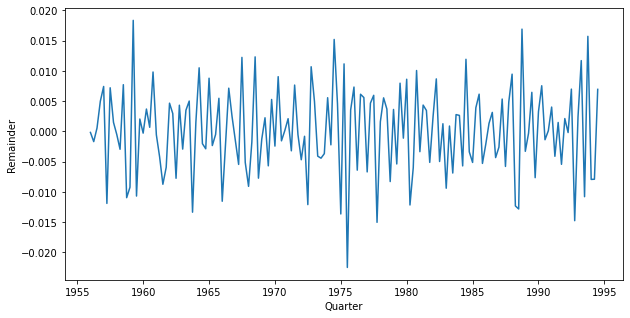

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL

# Load data
AusEl = pd.read_csv('Time Series Mathematical Models/data/AustralianElectricity.csv', sep =";")
# Create pandas DateTimeIndex
dtindexE = pd.DatetimeIndex(data=pd.to_datetime(AusEl["Quarter"]), 
                            freq='infer')

# Set as Index
AusEl.set_index(dtindexE, inplace=True)
AusEl.drop("Quarter", axis=1, inplace=True)

# Decomposition on log-model using STL
decomp = STL(np.log(AusEl), seasonal=15)
decomp = decomp.fit()

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(decomp.resid)
plt.xlabel("Quarter")
plt.ylabel("Remainder")

plt.show()

The series does not exhibit any seasonal patterns, has a constant mean (0) and roughly constant variance. From visual inspection one would conclude that the underlying process is stationary. 

The next example is the air temperature measurement. We again read the data, choose a window of appropriate size and coerce it into a time series. Afterwards we decompose the data (without log transform) by STL and study the remainder sequence. 

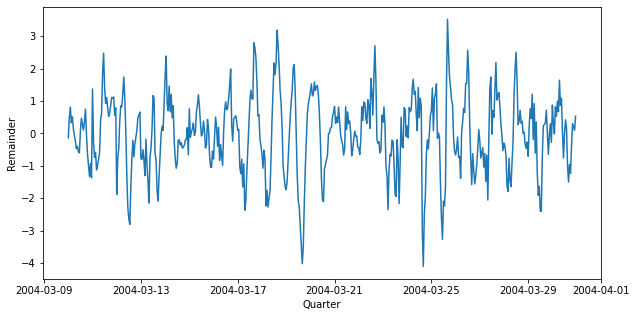

In [3]:
# Load data
AirQ = pd.read_csv('Time Series Mathematical Models/data/AirQualityUCI.csv',
                   parse_dates=True, decimal=",", sep=';')

# Combine Date and Time Columns:
AirQ["Time"] = AirQ["Time"].str.replace(".", ":")
AirQ["Date"] = pd.to_datetime(AirQ["Date"] + " " + AirQ["Time"])
dtindex = pd.DatetimeIndex(data=pd.to_datetime(AirQ["Date"]), 
                           freq='infer')

# Set as Index
AirQ.set_index(dtindex, inplace=True)
AirQ = AirQ.sort_index()
# Only keep temperature for given period
AirT = AirQ.loc["2004-3-10":"2004-3-30", "T"]
# AirT = pd.DataFrame(AirQ["T"])

# Decomposition on log-model using STL
decomp = STL(AirT, period=24 , seasonal=9)
decomp = decomp.fit()

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(decomp.resid)
plt.xlabel("Quarter")
plt.ylabel("Remainder")

plt.show()

The time series plot still exhibits some seasonality, such that stationarity of the underlying process seems unlikely. Different choices of **seasonal** in the **STL()** function will change the behaviour of the remainder sequence. 

### Mathematical Models for Time Series Example 4.1:
We compute the estimators above for simulated data. First we simulate a realization of a moving average process.

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)

# White noise signal
w = np.random.normal(size=1000, loc=2, scale=0.1)
w = pd.DataFrame(w)
# Filter with window = 3
w = w.rolling(window=3).mean()

In `Python`, the autocovariance and -correlation can be computed with the `acof()` and `acf()` (from `statsmodels.tsa.stattools`) respectively. During the application of the moving average (in the `rolling` command), missing values are created at the boundaries. To omit `NaN` entries, the setting `missing` is set to `drop`.

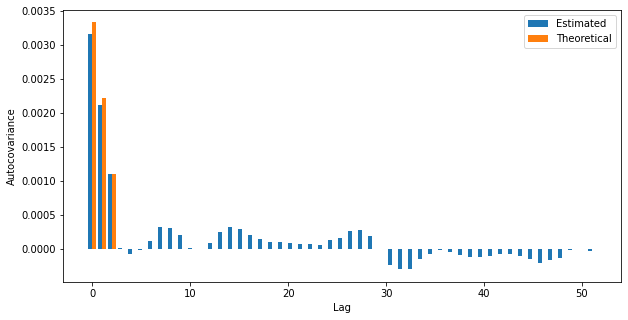

In [2]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acovf

# Autocovariance
ac = acovf(w, fft=False, missing='drop', nlag=50)

# Theoretical autocovariance
sigma = 0.1
act = np.zeros(len(ac))
act[0] = 3 / 9 * sigma**2
act[1] = 2 / 9 * sigma**2
act[2] = 1 / 9 * sigma**2


# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

width = 0.4
x = np.linspace(0, len(ac), len(ac))
ax.bar(x - width / 2, ac, width=width, label='Estimated')
ax.bar(x + width / 2, act, width=width, label='Theoretical')
plt.xlabel("Lag")
plt.ylabel("Autocovariance")
plt.legend()

plt.show()

The `nlag` parameter sets the maximal lag up to which the autocovariance should be computed. The figure shows the autocovariance of the moving average data. It can be seen that the lags $h=0,1,2$ produce a significant value and that for $h>2$ the autocovariance is very small. This is in accordance with the theoretical results. We add the values of the true autocovariance for comparison. Nevertheless, the sample autocovariance shows an oscillating pattern which we will comment on below.

### Mathematical Models for Time Series Example 4.2:
We again consider the moving average process. The following command produces the correlogram.

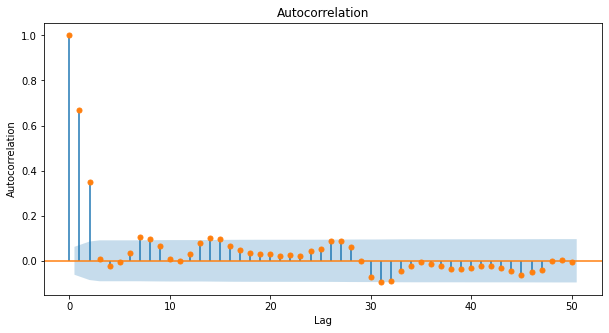

In [3]:
from statsmodels.graphics.tsaplots import plot_acf

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
plot_acf(w, missing='drop', lags=50, ax=ax, c='C1')
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

The two-sigma confidence bands are drawn automatically and we see that starting from the $3$rd all lags produce an autocorrelation which is in the band. In practice, once the estimated autocorrelation stays within these bands one sets it to 0 (A more formal way of testing is the _Ljung-Box test_ that tests the null-hypothesis that a number of autocorrelation coefficients is zero. The test is implemented in the `statsmodels.stats.diagnostic.acorr_ljungbox()`) 